In [1]:
# MLP모델의 설계 순서
# 1. 모듈 Import하기
# 2. 딥러닝 모델을 설계할 떄 활용하는 장비 확인하기
# 3. MNIST 데이터 다운로드하기(Train Set, Test Set 분리하기)
# 4. 데이터 확인하기 (1)
# 5. 데이터 확인하기 (2)
# 6. MLP(Multi Layer Perceptron) 모델 설계하기
# 7. Optimizer, Objective Function 설정하기
# 8. MLP 모델 학습을 진행하면서 학습 데이터에 대한 모델 성능을 확인하는 함수 정의하기
# 9. 학습되는 과정 속에서 검증 데이터에 대한 모델의 성능을 확인하는 함수 정의하기
# 10. MLP 학습을 실행하면서 Train, Test Set의 Loss 및 Test Set Accuracy 확인하기

In [2]:
'''1. 모듈 Import 하기'''
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [3]:
'''2. 딥러닝 모델을 설계할 때 활용하는 장비 확인하기'''
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    
print('Using PyTorch version', torch.__version__, ' Device:', DEVICE)

Using PyTorch version 1.10.1  Device: cpu


In [4]:
BATCH_SIZE = 32
EPOCHS = 10

In [5]:
'''3. MNIST 데이터 다운로드(Train set, Test set 분리하기)'''''
train_dataset = datasets.MNIST(root = "../data/MNIST",
                                train = True,
                                download = True,
                                transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root = "../data/MNIST",
                                train = False,
                                transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = False)

In [6]:
'''4. 데이터 확인하기 (1)'''
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type', X_train.type())
    print('y_train', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type torch.FloatTensor
y_train torch.Size([32]) type: torch.LongTensor


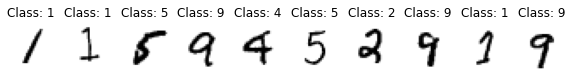

In [7]:
'''5. 데이터 확인하기 (2)'''
pltsize = 1
plt.figure(figsize=(10*pltsize, pltsize))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28),cmap="gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

In [8]:
'''6. MLP(Multi Layer Perceptron) 모델 설계하기'''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x,dim =1)
        return x

In [9]:
'''7. Optimizer, Objective Function 설정하기'''
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [10]:
'''8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의'''
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx,(image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{}({:0f}%)]\tTrain Loss: {:6f}".format(
                    Epoch, batch_idx*len(image),
                    len(train_loader.dataset), 100. * batch_idx/len(train_loader),
                    loss.item()))

In [11]:
'''9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의'''
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100.*correct/len(test_loader.dataset)
    return test_loss, test_accuracy

In [14]:
'''10. MLP 학습을 실행하면서 Train, Test set의 Loss 및 Test set Accuracy를 확인하기'''
for Epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".
         format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0.000000%)]	Train Loss: 0.205321
Train Epoch: 1 [6400/60000(10.666667%)]	Train Loss: 0.365536
Train Epoch: 1 [12800/60000(21.333333%)]	Train Loss: 0.277539
Train Epoch: 1 [19200/60000(32.000000%)]	Train Loss: 0.119921
Train Epoch: 1 [25600/60000(42.666667%)]	Train Loss: 0.200469
Train Epoch: 1 [32000/60000(53.333333%)]	Train Loss: 0.320745
Train Epoch: 1 [38400/60000(64.000000%)]	Train Loss: 0.141999
Train Epoch: 1 [44800/60000(74.666667%)]	Train Loss: 0.420950
Train Epoch: 1 [51200/60000(85.333333%)]	Train Loss: 0.172867
Train Epoch: 1 [57600/60000(96.000000%)]	Train Loss: 0.578845

[EPOCH: 1], 	Test Loss: 0.0083, 	Test Accuracy: 92.22 %

Train Epoch: 2 [0/60000(0.000000%)]	Train Loss: 0.199740
Train Epoch: 2 [6400/60000(10.666667%)]	Train Loss: 0.565423
Train Epoch: 2 [12800/60000(21.333333%)]	Train Loss: 0.916933
Train Epoch: 2 [19200/60000(32.000000%)]	Train Loss: 0.243273
Train Epoch: 2 [25600/60000(42.666667%)]	Train Loss: 0.280475
Train Epoch: 2 [32000/60